# Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset Generation

In [2]:
# np.random.seed(2021)
n = 20
L = np.sort(np.random.randint(n*10,size=(n,)))
R = L+np.random.randint(1,n,size=(n,))
for i in range(n-1):
    if L[i]==L[i+1] and R[i]<R[i+1]:
        R[i]=R[i+1]+R[i]
        R[i+1]=R[i]-R[i+1]
        R[i]=R[i]-R[i+1]


In [3]:
L,R 

(array([ 26,  30,  32,  38,  50,  52,  59,  67,  68,  86,  86, 101, 139,
        142, 161, 166, 169, 173, 175, 188]),
 array([ 29,  47,  33,  50,  68,  57,  75,  80,  77,  91,  87, 117, 155,
        153, 171, 168, 171, 191, 181, 196]))

# Algorithm

In [4]:
result = []
current = 0 
while(current<n):
    result.append(current) #最小左顶点区间放入结果集合
    num = 0
    maxR = -1
    s = -1
    I = set()
    for i in range(current+1,n):
        if L[i]<=R[current]:
            num = num+1 #统计和最小左顶点区间有交集的区间个数以便于计算下一次区间的位置。
            I.add(R[i])
            if R[i]>maxR:
                maxR=R[i]
                s=i        
    if len(I)==0:
        current = current + num +1
    else:
        maxR = max(I)
        if maxR<=R[current]:
            current = current+num+1
        else:
            current = s    

result

[0, 1, 3, 4, 7, 9, 11, 12, 14, 17, 19]

# Visualization
The red intervals are the ones we need in the end. The blue ones, nevertheless, are those we do not require. To view it easier, I drew yellow lines to combine these red intervals.

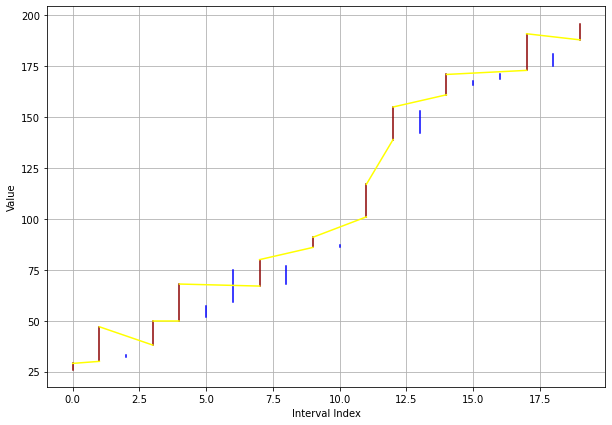

In [5]:
plt.figure(figsize=(10,7))
plt.grid()
for i in range(n):
    if i in result:
        plt.plot([i,i],[L[i],R[i]],c='darkred')
    else:
        plt.plot([i,i],[L[i],R[i]],c='b')
for i in range(len(result)-1):
    plt.plot([result[i],result[i+1]],[R[result[i]],L[result[i+1]]],c='yellow')
plt.xlabel('Interval Index')
plt.ylabel('Value')
# plt.legend(('Expected Interval','Unexpected Interval','Path'))
plt.savefig('result.jpg')
plt.show()